In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import shutil

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NOTE! Installing ujson may make loading annotations faster.


2024-01-16 13:33:49.150 | DEBUG    | incision_detection_mmdet:<module>:19 - 1.12.0a0+8a1a93a
2024-01-16 13:33:49.152 | DEBUG    | incision_detection_mmdet:<module>:24 - mmdet.version=2.25.0
2024-01-16 13:33:49.153 | DEBUG    | incision_detection_mmdet:<module>:29 - 11.7
2024-01-16 13:33:49.153 | DEBUG    | incision_detection_mmdet:<module>:30 - GCC 9.4
2024-01-16 13:33:49.671 | DEBUG    | pigleg_cv:<module>:53 - DEVICE=None


In [2]:
!pwd

/webapps/piglegsurgery/piglegcv


In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!nvidia-smi

Tue Jan 16 13:35:33 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:42:00.0 Off |                  N/A |
| 33%   61C    P2   151W / 250W |   4836MiB / 11175MiB |     67%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
torch.__version__

'1.12.0a0+8a1a93a'

In [6]:
Path("~/.cache/torch/hub/checkpoints/").expanduser().exists()

True

In [7]:
!ls ~/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [8]:
# pip install mmcv-full

# Select video

In [120]:
is_microsurgery = False
test_first_seconds=False
n_stitches = 3
use_application_outputdir = True

patch = "*/Anasto*.mp4"
# patch = "*/2023_10_11_B-Grübbel_Mareike_Fortlaufende_Transkutannaht.mov"
# patch = "Einzel.MOV"
patch = "test_4.mp4"; n_stitches=0
# patch = "micro_01*.mp4"
# patch = "2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"; n_stitches=5
# patch = "Katharina_Einzelknopfnaht"; n_stitches=3
# patch = "Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnaht_am_Schweinefu_"; n_stitches=0
# patch = "Good-162880einzelknopf"; n_stitches=5
# patch = "Good-2021_11_03_B_Zu_hl_Amelie_Einzelknopfnaht_Schweinefu_.mp4"; n_stitches=5
patch = "Good-Schweinefu__Einzelknopfnaht.mp4"; n_stitches=2


img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(f"*/*{patch}*"))
# assert len(img_pths) == 1, img_pths
mediafile_path = img_pths[0]


# original outputdir
if use_application_outputdir:
    outputdir = list(list(Path("../piglegsurgeryweb/media/").glob(f"*/*{patch}*.zip"))[0].parent.glob("*/meta.json"))[0].parent
    outputdir = outputdir.absolute().resolve()
    outputdir
else:
    outputdir = Path("./del_test_video_output/") / mediafile_path.name

2024-01-16 23:28:49.497 | DEBUG    | pigleg_cv:<module>:54 - DEVICE=None
2024-01-16 23:28:50.486 | DEBUG    | pigleg_cv:find_stitch_ends_in_tracks:750 - find_stitch_end, n_clusters=2, outputdir=PosixPath('/webapps/piglegsurgery/piglegsurgeryweb/media/SA_20220801-105816_386i45phs69h/SA_20220801-105816')
2024-01-16 23:28:50.501 | DEBUG    | pigleg_cv:_get_metadata:689 - incision_bboxes=[[214.97598266601562, 351.96014404296875, 374.8182067871094, 410.4454345703125, 0.9911012053489685]]
2024-01-16 23:28:50.502 | DEBUG    | pigleg_cv:_get_metadata:691 - find stitch end, pix_size=0.000494442750531437, fps=25
2024-01-16 23:28:50.504 | DEBUG    | tools:filter_points_in_bbox:198 - [135.05487060546875, 322.7174987792969, 454.73931884765625, 439.6880798339844, 0.9911012053489685]
2024-01-16 23:28:50.506 | DEBUG    | pigleg_cv:_get_X_px_fr:662 - X_px_fr.shape=(1976, 3), X_px_fr_tmp.shape=(1763, 3)
2024-01-16 23:28:50.508 | DEBUG    | tools:filter_points_in_bbox:198 - [135.05487060546875, 322.71749

([1.48, 42.84, 53.96, 107.64], [37, 1071, 1349, 2691])

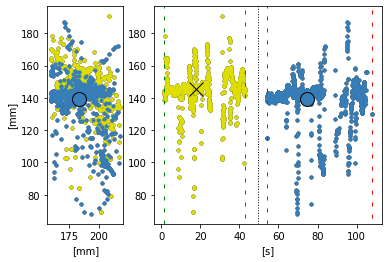

In [127]:
plt.close()
pigleg_cv.find_stitch_ends_in_tracks(outputdir,n_clusters=n_stitches, plot_clusters=True, tool_indexes=[0,1], trim_tool_indexes=[0,1])

# more deep debug

2024-01-16 23:24:15.200 | DEBUG    | pigleg_cv:<module>:53 - DEVICE=None
2024-01-16 23:24:15.680 | DEBUG    | __main__:find_stitch_ends_in_tracks:88 - find_stitch_end, n_clusters=2, outputdir=PosixPath('/webapps/piglegsurgery/piglegsurgeryweb/media/SA_20220801-105816_386i45phs69h/SA_20220801-105816')
2024-01-16 23:24:15.694 | DEBUG    | __main__:_get_metadata:27 - incision_bboxes=[[214.97598266601562, 351.96014404296875, 374.8182067871094, 410.4454345703125, 0.9911012053489685]]
2024-01-16 23:24:15.695 | DEBUG    | __main__:_get_metadata:29 - find stitch end, pix_size=0.000494442750531437, fps=25
2024-01-16 23:24:15.696 | DEBUG    | tools:filter_points_in_bbox:198 - [135.05487060546875, 322.7174987792969, 454.73931884765625, 439.6880798339844, 0.9911012053489685]
2024-01-16 23:24:15.699 | DEBUG    | pigleg_cv:_get_X_px_fr:661 - X_px_fr.shape=(1976, 3), X_px_fr_tmp.shape=(1763, 3)
2024-01-16 23:24:15.700 | DEBUG    | tools:filter_points_in_bbox:198 - [135.05487060546875, 322.71749877929

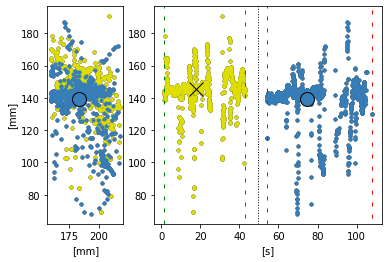

In [124]:
from typing import Union, Optional, List
from loguru import logger
import json
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering



_=find_stitch_ends_in_tracks(outputdir,n_clusters=n_stitches, plot_clusters=True, tool_indexes=[0,1], trim_tool_indexes=[0,1])


In [82]:
n_clusters=n_stitches
tool_indexes:Union[int,List[int]] = [0, 1]
trim_tool_indexes:Union[int,List[int]] = [0,1]
time_axis=int(2)
data, metadata, incision_bboxes = _get_metadata(outputdir)

X_px_fr = pigleg_cv._get_X_px_fr_more_tools(data, incision_bboxes, tool_indexes, time_axis=time_axis)
# pix_size is in [m] to normaliza data a bit we use [mm]
axis_normalization = np.asarray(
    [
        metadata["qr_data"]["pix_size"] * 1000,
        metadata["qr_data"]["pix_size"] * 1000,
        1.0 / metadata["fps"],
    ]
)

X = X_px_fr * axis_normalization

2024-01-16 22:37:32.872 | DEBUG    | __main__:_get_metadata:27 - incision_bboxes=[]
2024-01-16 22:37:32.873 | DEBUG    | __main__:_get_metadata:29 - find stitch end, pix_size=0.00041666666666666664, fps=25


In [88]:
from sklearn.cluster import SpectralClustering
weight_of_later = 0.5
# time =  np.asarray(list(range(X.shape[0]))).reshape(-1,1)
# time =  np.asarray(data["frame_ids"][tool_index]).reshape(-1,1) / metadata["fps"]

# X = np.concatenate([X, time], axis=1)
# X = X * axis_normalization

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms = SpectralClustering(n_clusters=n_clusters)
ms = KMeans(n_clusters=n_clusters)
# ms = DBSCAN()
# ms = SpectralClustering()
# ms = SpectralClustering(3, affinity='precomputed', n_init=100,
#                       assign_labels='discretize')
# ms = GaussianMixture()
ms.fit(X)
labels = ms.labels_
# labels = ms.predict(X)
cluster_centers = ms.cluster_centers_

prev = labels[0]
splits_s = []
splits_frames = []
for frame_i, label in enumerate(labels):
    if label != prev:
        time = ((1 - weight_of_later) * X[frame_i - 1, time_axis]) + (
            weight_of_later * X[frame_i, time_axis]
        )
        splits_s.append(time)
        splits_frames.append(int(time * float(metadata["fps"])))
    prev = label


/home/appuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, '[mm]')

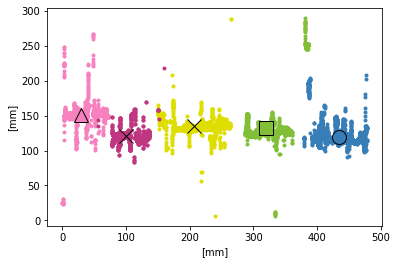

In [91]:
colors = [
    "#dede00",
    "#377eb8",
    "#f781bf",
    "#81bf37",
    "#bf3781",
    "#f3781b",
    "#eb88b1",
    "#1bff78",
]
markers = [ "x", "o","^","s","x","o","^","x","o","^","x","o","^"]
markers_x = ["." for i in range(len(colors))]
markers_o = ["." for i in range(len(colors))]

ax0 = 2
ax1 = 0

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
# draw additional points used for cropping
# plt.plot(X[:,ax0],X[:,ax1], ".", color=colors[np.asarray(labels).astype(int)]) 

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, ax0], X[my_members, ax1], markers_x[k], color=col)
    plt.plot(
        cluster_center[ax0],
        cluster_center[ax1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.xlabel("[mm]")
plt.ylabel("[mm]")

In [92]:
import sklearn


In [110]:
X.shape

(14167, 3)

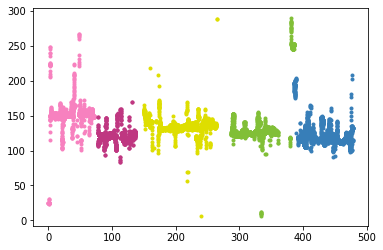

In [114]:




labels1 = smooth_in_1D(X, time_axis)

for k, col in zip(range(n_clusters_), colors):
    my_members = labels1 == k
    # cluster_center = cluster_centers[k]
    plt.plot(X[my_members, ax0], X[my_members, ax1], markers_x[k], color=col)

In [109]:
clf.predict(np.asarray([1,2,3,300,299,298, 450,451,455]).reshape(-1,1))

array([2, 2, 2, 3, 3, 3, 1, 1, 1], dtype=int32)

## Do whole processing together


2024-01-15 15:29:28.777 | DEBUG    | pigleg_cv:__init__:102 - ###############
2024-01-15 15:29:28.797 | DEBUG    | pigleg_cv:__init__:103 - device=cpu
2024-01-15 15:29:28.812 | DEBUG    | pigleg_cv:__init__:104 - test_first_seconds=False
2024-01-15 15:29:28.814 | DEBUG    | pigleg_cv:__init__:105 - is_microsurgery=False
2024-01-15 15:29:28.815 | DEBUG    | pigleg_cv:__init__:134 - self.is_microsurgery=False
2024-01-15 15:29:28.816 | INFO     | pigleg_cv:run:138 - CV processing started on ../piglegsurgeryweb/media/upload/20231213-082852_pigleg_test_4_c01bb28928f8241f5cb69c0cee9f09a0e873f815/pigleg_test_4.mp4, outputdir=del_test_video_output/pigleg_test_4.mp4
2024-01-15 15:29:28.818 | DEBUG    | pigleg_cv:run:141 - self.is_microsurgery=False
2024-01-15 15:29:28.819 | DEBUG    | pigleg_cv:run:142 - False, <class 'bool'>
2024-01-15 15:29:28.820 | DEBUG    | pigleg_cv:run:143 - <class 'bool'>
2024-01-15 15:29:28.821 | DEBUG    | pigleg_cv:run:144 - False
2024-01-15 15:29:28.823 | DEBUG    |

Fusing layers... 
IDetect.fuse


/opt/conda/lib/python3.8/site-packages/torch/functional.py:598: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2323.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
2024-01-15 15:29:38.027 | DEBUG    | run_qr:bbox_info_extraction_from_frame:209 - qr code text = 'Resolution 30 mm'
2024-01-15 15:29:38.029 | DEBUG    | run_qr:bbox_info_extraction_from_frame:209 - qr code text = 'Scissors 30 mm'
2024-01-15 15:29:38.031 | DEBUG    | run_qr:bbox_info_extraction_from_frame:308 - qr_data={'is_microsurgery': False, 'pix_size_method': 'weighted_average', 'is_detected': True, 'box': [[410, 287], [532, 286], [535, 164], [411, 164]], 'pix_size': 0.00024479065366737673, 'incision_bboxes': [[774.2468872070312, 706.2264404296875, 1064.2303466796875, 784.998291015625, 0.9780232310295105]], 'qr_size': 0.03, 'size_by_scene': 0.00015625, 'text

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2024-01-15 15:29:44.337 | DEBUG    | incision_detection_mmdet:run_incision_detection:271 - number of detected incisions = 1
2024-01-15 15:29:44.339 | DEBUG    | pigleg_cv:get_parameters_for_crop_rotate_rescale:413 - qr_data={'is_microsurgery': False, 'pix_size_method': 'weighted_average', 'is_detected': True, 'box': [[410, 287], [532, 286], [535, 164], [411, 164]], 'pix_size': 0.00024479065366737673, 'incision_bboxes': [[774.2468872070312, 706.2264404296875, 1064.2303466796875, 784.998291015625, 0.9780232310295105]], 'qr_size': 0.03, 'size_by_scene': 0.00015625, 'text': 'Resolution 30 mm', 'pix_size_single_frame_detector_m': 0.00023340120243941213, 'bbox_scene_area': [237.48182678222656, 1.596093773841858, 1683.50341796875, 1080.0, 0.6937737464904785], 'bbox_micro_calibration': [], 'qr_scissors_frame_detected': True, 'qr_bboxes_SID': [[404.9392395019531, 158.84629821777344, 542.061279296875, 293.9641418457031, 0.9962145686149597], [1111.7254638671875, 165.35377502441406, 1253.772949218

Fusing layers... 
IDetect.fuse


2024-01-15 15:29:53.641 | DEBUG    | run_qr:bbox_info_extraction_from_frame:209 - qr code text = 'Scissors 30 mm'
2024-01-15 15:29:53.642 | DEBUG    | run_qr:bbox_info_extraction_from_frame:209 - qr code text = 'Resolution 30 mm'
2024-01-15 15:29:53.643 | DEBUG    | run_qr:bbox_info_extraction_from_frame:308 - qr_data={'is_microsurgery': False, 'pix_size_method': 'weighted_average', 'is_detected': True, 'box': [[439, 149], [500, 150], [504, 86], [441, 85]], 'pix_size': 0.00048797192645420965, 'incision_bboxes': [[270.26287841796875, 352.0305480957031, 410.5086975097656, 390.61376953125, 0.9813022017478943]], 'qr_size': 0.03, 'size_by_scene': 0.00041666666666666664, 'text': 'Resolution 30 mm', 'pix_size_single_frame_detector_m': 0.00046039570111101955, 'bbox_scene_area': [0.0, 0.0, 720.0, 536.0, 0.6495135426521301], 'bbox_micro_calibration': [], 'qr_scissors_frame_detected': True, 'qr_bboxes_SID': [[84.00880432128906, 79.19088745117188, 152.8837432861328, 146.4113006591797, 0.9950470924

Fusing layers... 
IDetect.fuse


2024-01-15 15:30:00.161 | DEBUG    | run_qr:bbox_info_extraction_from_frame:209 - qr code text = 'Scissors 30 mm'
2024-01-15 15:30:00.162 | DEBUG    | run_qr:bbox_info_extraction_from_frame:209 - qr code text = 'Resolution 30 mm'
2024-01-15 15:30:00.163 | DEBUG    | run_qr:bbox_info_extraction_from_frame:308 - qr_data={'is_microsurgery': False, 'pix_size_method': 'weighted_average', 'is_detected': True, 'box': [[439, 149], [500, 150], [504, 86], [441, 85]], 'pix_size': 0.00048797192645420965, 'incision_bboxes': [[270.26287841796875, 352.0305480957031, 410.5086975097656, 390.61376953125, 0.9813022017478943]], 'qr_size': 0.03, 'size_by_scene': 0.00041666666666666664, 'text': 'Resolution 30 mm', 'pix_size_single_frame_detector_m': 0.00046039570111101955, 'bbox_scene_area': [0.0, 0.0, 720.0, 536.0, 0.6495135426521301], 'bbox_micro_calibration': [], 'qr_scissors_frame_detected': True, 'qr_bboxes_SID': [[84.00880432128906, 79.19088745117188, 152.8837432861328, 146.4113006591797, 0.9950470924

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


2024-01-15 15:30:05.314 | DEBUG    | incision_detection_mmdet:run_incision_detection:271 - number of detected incisions = 1
2024-01-15 15:30:05.319 | DEBUG    | run_perpendicular:main_perpendicular:336 - len(imgs)=1
2024-01-15 15:30:05.376 | DEBUG    | tools:save_json:17 - Writing 'del_test_video_output/pigleg_test_4.mp4/perpendicular_0.json'
2024-01-15 15:30:05.381 | DEBUG    | tools:save_json:26 - old keys: ['intersections', 'alphas']
2024-01-15 15:30:05.382 | DEBUG    | tools:save_json:28 - updated keys: ['intersections', 'alphas']
2024-01-15 15:30:05.854 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:53 - cfg_path=PosixPath('stitch_detection_mmdet_config.py'), True
2024-01-15 15:30:05.858 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:54 - checkpoint_path=PosixPath('/webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth'), True


load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/stitch_detection_models/model.pth


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
2024-01-15 15:30:11.459 | DEBUG    | tools:save_json:17 - Writing 'del_test_video_output/pigleg_test_4.mp4/stitch_detection_0.json'
2024-01-15 15:30:11.464 | DEBUG    | tools:save_json:26 - old keys: ['stitch_labels', 'stitch_bboxes']
2024-01-15 15:30:11.466 | DEBUG    | tools:save_json:28 - updated keys: ['stitch_labels', 'stitch_bboxes']
2024-01-15 15:30:11.473 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:114 - number of filtered stitches = 4
2024-01-15 15:30:11.478 | DEBUG    | stitch_detection_mmdet:run_stitch_detection:115 - Stitch detection finished, boxes in: del_test_video_output/pigleg_test_4.mp4/stitch_detection_0.json
2024-01-15 15:30:11.554 | DEBUG    | stitch_detection_mmdet:run_stitch_analyser:193 - R-squared 

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack/epoch.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_backbone_stage1

2024-01-15 15:32:51,361 - mmdet - INFO - image shape: height=800, width=1440 in YOLOX.__init__
2024-01-15 15:32:51,423 - mmtrack - INFO - initialize YOLOX with init_cfg {'type': 'Pretrained', 'checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth'}
2024-01-15 15:32:51,424 - mmcv - INFO - load model from: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2024-01-15 15:32:51,430 - mmcv - INFO - load checkpoint from http path: https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_x_8x8_300e_coco/yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth
2024-01-15 15:32:51,942 - mmcv - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cls.0.weight: copying a param with shape torch.Size([80, 320, 1, 1]) from checkpoint, the shape in current model is torch.Size([5, 320, 1, 

load checkpoint from local path: /webapps/piglegsurgery/piglegcv/resources/tracker_model_bytetrack_hands_tools/epoch_2.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_detector_backbone_stem_conv_conv_weight, ema_detector_backbone_stem_conv_bn_weight, ema_detector_backbone_stem_conv_bn_bias, ema_detector_backbone_stem_conv_bn_running_mean, ema_detector_backbone_stem_conv_bn_running_var, ema_detector_backbone_stem_conv_bn_num_batches_tracked, ema_detector_backbone_stage1_0_conv_weight, ema_detector_backbone_stage1_0_bn_weight, ema_detector_backbone_stage1_0_bn_bias, ema_detector_backbone_stage1_0_bn_running_mean, ema_detector_backbone_stage1_0_bn_running_var, ema_detector_backbone_stage1_0_bn_num_batches_tracked, ema_detector_backbone_stage1_1_main_conv_conv_weight, ema_detector_backbone_stage1_1_main_conv_bn_weight, ema_detector_backbone_stage1_1_main_conv_bn_bias, ema_detector_backbone_stage1_1_main_conv_bn_running_mean, ema_detector_b

2024-01-15 15:33:00.014 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 0, 0.00% (0.36s elapsed, 1000.00s remaining)
2024-01-15 15:48:02.795 | DEBUG    | run_tracker_bytetrack:main_tracker_bytetrack:157 - Tracking on frame 50, 52.63% (903.07s elapsed, 812.76s remaining)
2024-01-15 15:59:46.189 | DEBUG    | pigleg_cv:run_video_processing:310 - Tracker finished in 1774.4133596420288s.
2024-01-15 15:59:46.259 | DEBUG    | pigleg_cv:run_video_processing:313 - filename=del_test_video_output/pigleg_test_4.mp4/__cropped.mp4, outputdir=del_test_video_output/pigleg_test_4.mp4
2024-01-15 15:59:46.271 | DEBUG    | pigleg_cv:run_video_processing:314 - filename=True, outputdir=True
2024-01-15 15:59:46.295 | DEBUG    | run_report:bboxes_to_points:698 - Sort data N=95
2024-01-15 15:59:46.303 | DEBUG    | run_report:bboxes_to_points:699 - data_pixels=[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
2024-01-15 15:59:46.330 | DEBUG    | tools:save_json:17 - 

8204.827250936069


2024-01-15 15:59:47.147 | DEBUG    | run_report:create_video_report_figure:626 - main_video_report: OK
2024-01-15 15:59:47.224 | DEBUG    | run_report:main_report:1072 - Report on frame 0 done, 0.00% (0.38s elapsed, 1000.00s remaining)
2024-01-15 15:59:49.385 | DEBUG    | run_report:main_report:1072 - Report on frame 50 done, 52.63% (2.54s elapsed, 2.28s remaining)
2024-01-15 15:59:51.014 | DEBUG    | run_report:main_report:1155 - pix_size=0.0004575163398692811
2024-01-15 15:59:51.015 | DEBUG    | run_report:main_report:1156 - frameshape=(420, 1119, 3)
2024-01-15 15:59:51.020 | DEBUG    | run_report:main_report:1157 - confidence_score_thr=0.0
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample -

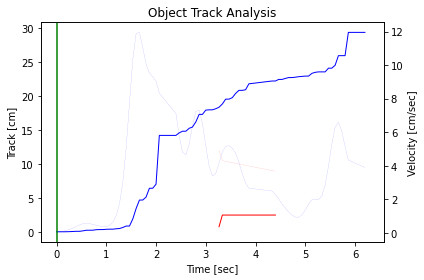

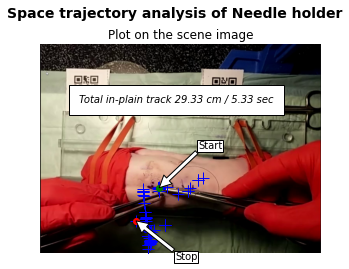

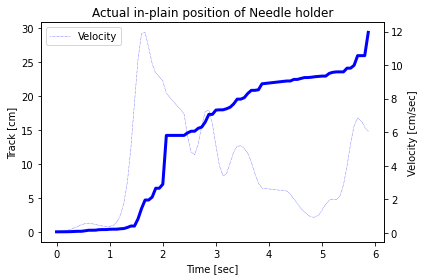

In [13]:
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery)
dcv.run()

In [12]:
# report_data = dcv.make_report()

[0, 67]

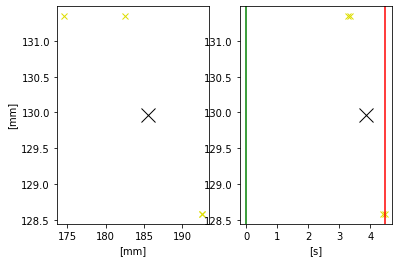

In [14]:
dcv._find_stitch_ends_in_tracks(n_clusters= n_stitches, plot_clusters=True)

/home/appuser/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


([5.0,
  64.66666666666667,
  86.26666666666667,
  141.93333333333334,
  142.66666666666666,
  228.53333333333333],
 [75, 970, 1294, 2129, 2140, 3428])

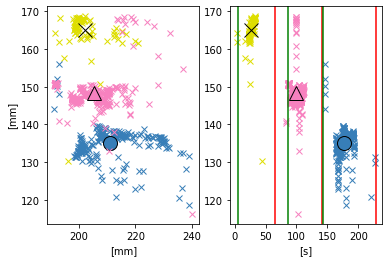